# 4.10 Coding Etiquette and Excel Reporting

### Part 1: Task

In [4]:
## Import the packages required for the data analysis

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
## Importing the data set required for the analysis

path = r'/Users/balachandark/Desktop/Instacart Basket Analysis'
ords_prods_customer = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'ords_prods_customer.pkl'))

In [6]:
## Checking the columns

ords_prods_customer.head()

,order_id,user_id,evaluation_set,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,...,order_freq_flag,first_name,surname,gender,state,age,date_joined,no_of_dependants,family_status,income
0,2539329.0,1.0,prior,1.0,2,8,NaN,196,1,0,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
1,2539329.0,1.0,prior,1.0,2,8,NaN,14084,2,0,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
2,2539329.0,1.0,prior,1.0,2,8,NaN,12427,3,0,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
3,2539329.0,1.0,prior,1.0,2,8,NaN,26088,4,0,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
4,2539329.0,1.0,prior,1.0,2,8,NaN,26405,5,0,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423


##### **Q2: Dropping the name columns as they can data identification threat.**

In [8]:
## Drop name columns

ords_prods_customer = ords_prods_customer.drop(['first_name', 'surname'], axis = 1)

In [9]:
ords_prods_customer.columns

Index(['order_id', 'user_id', 'evaluation_set', 'order_number',
       'orders_day_of_week', 'order_hour_of_day', 'days_since_prior_order',
       'product_id', 'add_to_cart_order', 'reordered', 'product_name',
       'aisle_id', 'department_id', 'prices', 'busiest_day',
       'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'spending_behavior', 'spending_flag', 'order_frequent',
       'order_freq_flag', 'gender', 'state', 'age', 'date_joined',
       'no_of_dependants', 'family_status', 'income'],
      dtype='object')

In [10]:
## Renaming the family status column to marital status

ords_prods_customer = ords_prods_customer.rename(columns = {'family_status':'marital_status'})

##### **Q3.1: Regional segmentation of the data**

In [12]:
## Creating regions based on the state column

def create_region(x):
    if x in ['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'Pennsylvania', 'New Jersey']:
        return 'Northeast'
    elif x in ['Wisconsin','Michigan','Illinois','Indiana','Ohio','North Dakota','South Dakota','Nebraska','Kansas','Minnesota','Iowa','Missouri']:
        return 'Midwest'
    elif x in ['Delaware','Maryland','District of Columbia','Virginia',
                   'West Virginia','North Carolina','South Carolina','Georgia','Florida','Kentucky',
                   'Tennessee','Mississippi','Alabama','Oklahoma','Texas','Arkansas','Louisiana']:
        return 'East South Central'
    else:
        return 'West'

In [13]:
## Creating the region column
ords_prods_customer['region'] = ords_prods_customer['state'].apply(create_region)

##### **Q3.2: Relationship between spending and regions**

In [15]:
pd.crosstab(ords_prods_customer['region'], ords_prods_customer['spending_flag'])

spending_flag,High spender,Low spender
region,,
East South Central,10582194,209691
Midwest,7441350,155975
Northeast,5614511,108225
West,8132559,160354


##### **Q4: Creating exclusion flag**

In [17]:
ords_prods_customer['total_order'] = ords_prods_customer.groupby(['user_id'])['order_number'].transform('sum')

ords_prods_customer.loc[ords_prods_customer['total_order'] >= 5, 'exclusion_flag'] = 'high-actitvity customer'
ords_prods_customer.loc[(ords_prods_customer['total_order'] < 5), 'exclusion_flag'] = 'low-activity customer'

ords_prods_customer.shape

(32404859, 32)

In [18]:
## Removing the customers with low-activity flag

ords_prods_customer = ords_prods_customer[ords_prods_customer['exclusion_flag'] == 'high-actitvity customer']

## checking the shape of the new data frame

ords_prods_customer.shape

(32404856, 32)

##### Using the exclusion flag, we remove 3 customers. 

##### **Q5: Customer profiling**

In [21]:
## Creating customer profiles

ords_prods_customer['age'].min() ## minimum age is 18


18

In [22]:
ords_prods_customer['age'].max() ## maximum age is 81

81

In [23]:
## Number of dependents

ords_prods_customer['no_of_dependants'].min()

0

In [24]:
ords_prods_customer['no_of_dependants'].max()

3

In [25]:
ords_prods_customer['no_of_dependants'].value_counts()

no_of_dependants
3    8135109
0    8097502
2    8091141
1    8081104
Name: count, dtype: int64

In [26]:
## Creating age profile

ords_prods_customer.loc[(ords_prods_customer['age'] < 25), 'age_category'] = 'young adult'
ords_prods_customer.loc[(ords_prods_customer['age'] >= 25) & (ords_prods_customer['age'] < 40), 'age_category'] = 'adult'
ords_prods_customer.loc[(ords_prods_customer['age'] >= 40) & (ords_prods_customer['age'] <= 60), 'age_category'] = 'middle age'
ords_prods_customer.loc[(ords_prods_customer['age'] > 60), 'age_category'] = 'elderly'


In [27]:
## Checking the age profile categories

ords_prods_customer['age_category'].value_counts()

age_category
middle age     10657828
elderly        10582836
adult           7591191
young adult     3573001
Name: count, dtype: int64

In [28]:
## Creating dependent profile

ords_prods_customer.loc[(ords_prods_customer['no_of_dependants']) == 0, 'dependant_category'] = 'single'
ords_prods_customer.loc[(ords_prods_customer['no_of_dependants']) > 0, 'dependant_category'] = 'family'

In [29]:
## Checking the dependent category

ords_prods_customer['dependant_category'].value_counts()

dependant_category
family    24307354
single     8097502
Name: count, dtype: int64

In [30]:
## Creating department category based on the department id
## Department category information were obtained from Kaggle website

ords_prods_customer.loc[(ords_prods_customer['department_id']) == 1, 'department_category'] = 'frozen'
ords_prods_customer.loc[(ords_prods_customer['department_id']) == 2, 'department_category'] = 'other'
ords_prods_customer.loc[(ords_prods_customer['department_id']) == 3, 'department_category'] = 'bakery'
ords_prods_customer.loc[(ords_prods_customer['department_id']) == 4, 'department_category'] = 'produce'
ords_prods_customer.loc[(ords_prods_customer['department_id']) == 5, 'department_category'] = 'alcohol'
ords_prods_customer.loc[(ords_prods_customer['department_id']) == 6, 'department_category'] = 'international'
ords_prods_customer.loc[(ords_prods_customer['department_id']) == 7, 'department_category'] = 'beverages'
ords_prods_customer.loc[(ords_prods_customer['department_id']) == 8, 'department_category'] = 'pets'
ords_prods_customer.loc[(ords_prods_customer['department_id']) == 9, 'department_category'] = 'dry goods pasta'
ords_prods_customer.loc[(ords_prods_customer['department_id']) == 10, 'department_category'] = 'bulk'

In [31]:
## Creating income categories of customers
## Income categories are created based on the quantile information

ords_prods_customer.loc[(ords_prods_customer['income']) < 67004.0, 'income_category'] = 'low income'
ords_prods_customer.loc[(ords_prods_customer['income'] >= 67004.0) & (ords_prods_customer['income'] <= 96618.0), 'income_category'] = 'lower mid income'
ords_prods_customer.loc[(ords_prods_customer['income'] >= 96618.0) & (ords_prods_customer['income'] <= 127912.0), 'income_category'] = 'higher mid income'
ords_prods_customer.loc[(ords_prods_customer['income']) > 127912.0, 'income_category'] = 'high income'

##### Combination of multiple variables to create a customer profile will increase number of categories leading to confusion. Hence, the charts are produced with the profiles created based on one variables. The visualization will be produced for each of the customer profiles on the ordering behavior, expenditures, and answering key question of Instacart. 


##### Customer profiles created
#####      1. Age categories
#####      2. Dependant categories
#####      3. Department categories
#####      4. Income categories


##### **Q6: Visualization to show distribution of profiles**
##### Importance given to visuals addressing the key questions in the project brief

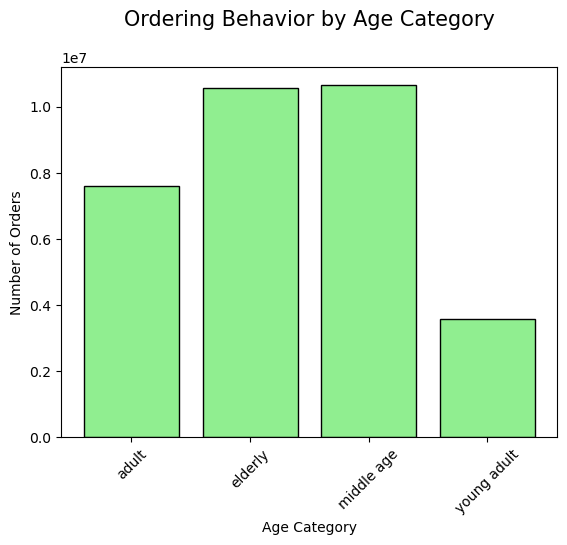

In [35]:
## Profile based visuals: Age categories
## Who orders the most? 
df_ordering_age = ords_prods_customer.groupby('age_category')['order_id'].count()

## Bar chart to show the differences in the ordering behavior of the customers

plt.bar(df_ordering_age.index, df_ordering_age.values, color = 'lightgreen', edgecolor = 'black')
plt.xlabel('Age Category')
plt.ylabel('Number of Orders')
plt.title('Ordering Behavior by Age Category',
         pad = 30,
         fontsize=15,
         fontweight=2)
plt.xticks(rotation=45);


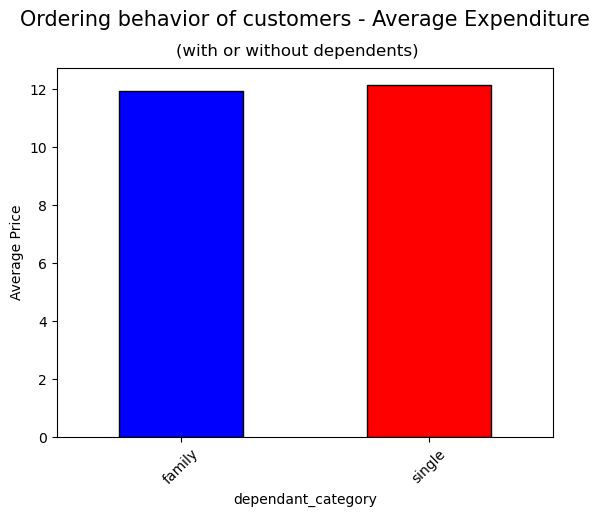

In [36]:
## Is there a difference in the expenditure behavior of people with dependants? 

ords_prods_customer.groupby('dependant_category')['prices'].mean().plot.bar(color=['blue','red'], edgecolor='black')
plt.xticks(rotation=45)
plt.title('Ordering behavior of customers - Average Expenditure', 
          pad = 30,
         fontsize=15,
         fontweight=2)
plt.suptitle('(with or without dependents)',
            x=0.5,
            y=0.93)
plt.ylabel('Average Price');

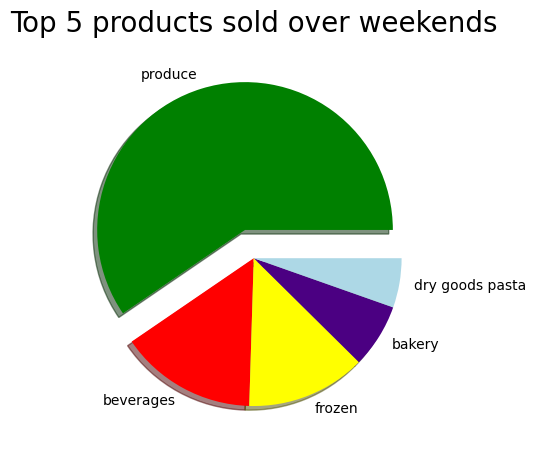

In [394]:
## What are the top 5 ordered products over the weekends? 
#  0 = Saturday, 1 = Sunday

# Filter only weekend orders
df_weekend = ords_prods_customer[ords_prods_customer['orders_day_of_week'].isin([0, 1])]

# Creating proportion information
df_weekend_plot = df_weekend['department_category'].value_counts(normalize=True)
df_weekend_plot = df_weekend_plot.reset_index()
df_weekend_plot.columns = ['department_category', 'proportion']

## Selecting the top 5 categories

df_weekend_plot = df_weekend_plot[df_weekend_plot['proportion'] > 0.016194]
my_explode = [0.2,0,0,0,0]
colors = ['green', 'red', 'yellow', 'indigo', 'lightblue']
## Creating a pie chart 
plt.pie(df_weekend_plot['proportion'], labels=df_weekend_plot['department_category'], 
        explode = my_explode, 
        autopct='%.1f%%', shadow = True, 
        colors = colors,
        labeldistance=1.1)
plt.title('Top 5 products sold over weekends', 
          pad = 30,
         fontsize=20,
         fontweight=2);


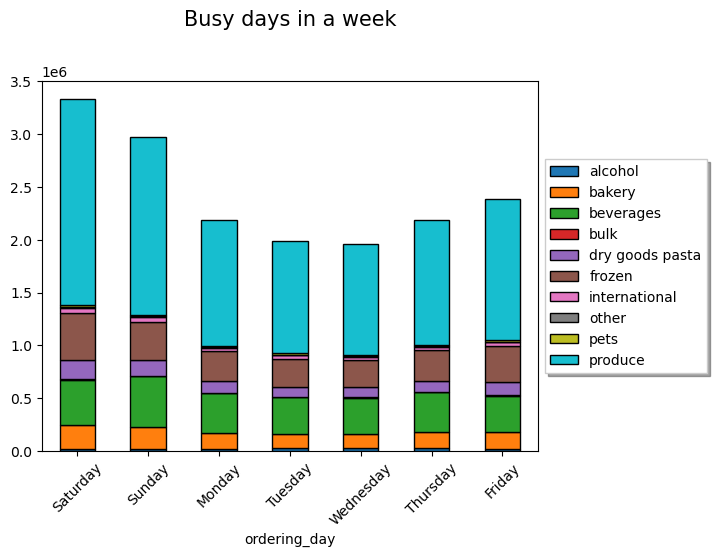

In [38]:
## On which day and which department gets most of the orders

ords_prods_customer.loc[(ords_prods_customer['orders_day_of_week']) == 0, 'ordering_day'] = 'Saturday'
ords_prods_customer.loc[(ords_prods_customer['orders_day_of_week']) == 1, 'ordering_day'] = 'Sunday'
ords_prods_customer.loc[(ords_prods_customer['orders_day_of_week']) == 2, 'ordering_day'] = 'Monday'
ords_prods_customer.loc[(ords_prods_customer['orders_day_of_week']) == 3, 'ordering_day'] = 'Tuesday'
ords_prods_customer.loc[(ords_prods_customer['orders_day_of_week']) == 4, 'ordering_day'] = 'Wednesday'
ords_prods_customer.loc[(ords_prods_customer['orders_day_of_week']) == 5, 'ordering_day'] = 'Thursday'
ords_prods_customer.loc[(ords_prods_customer['orders_day_of_week']) == 6, 'ordering_day'] = 'Friday'



# Create the crosstab
df_test = pd.crosstab(ords_prods_customer['ordering_day'], 
                       ords_prods_customer['department_category'])
day_order = ["Saturday", "Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday"]
df_test = df_test.reindex(day_order)


df_test.plot(kind='bar', stacked=True, edgecolor = 'black')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1, fancybox=False, shadow=True)
plt.xticks(rotation = 45)

plt.title('Busy days in a week', 
          pad = 40,
          fontsize=15,
         fontweight=2);

In [42]:
## Combining two customer profiles to create a new one
## To reduce the complexity, let's create profile with income and then number of dependents

## Classifying income based on the median levels: 
# Anyone below the median income is low income holder
# above the median income is high income holder
ords_prods_customer.loc[(ords_prods_customer['income']) < 96618, 'two_level_income_category'] = 'low income'
ords_prods_customer.loc[(ords_prods_customer['income']) > 96618, 'two_level_income_category'] = 'high income'

## Combining the income category with the dependents category

ords_prods_customer['customer_profile'] = ords_prods_customer['dependant_category'] + " " + ords_prods_customer['two_level_income_category']

## Checking the column

ords_prods_customer['customer_profile'].value_counts()

customer_profile
family low income     12173670
family high income    12133485
single high income     4068753
single low income      4028749
Name: count, dtype: int64

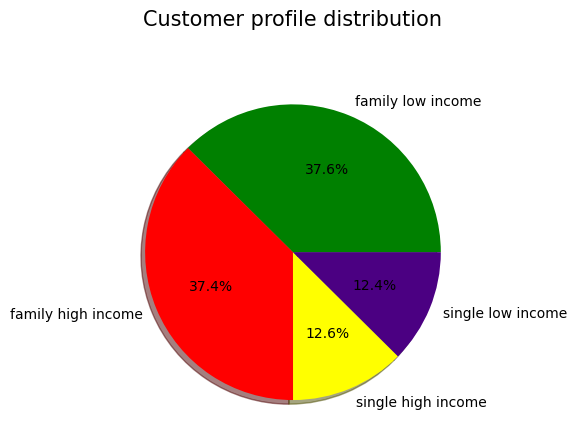

In [44]:
## Plot to show the distribution of the created customer profile
df_pie_plot = ords_prods_customer['customer_profile'].value_counts().reset_index()
df_pie_plot.columns=['customer_profile','total_numbers']

plt.pie(df_pie_plot['total_numbers'], labels=df_pie_plot['customer_profile'], 
        autopct='%.1f%%', shadow = True, 
        colors = colors,
        labeldistance=1.1)
plt.title('Customer profile distribution', 
          pad = 30,
         fontsize=15,
         fontweight=2);

##### **Q7: Aggregate the max, min, and mean - usage frequency and expenditure**

In [ ]:
## Creating the expenditure and order frequency based on age categories

ords_prods_customer.groupby('age_category').agg( {'prices':['mean','min','max'],
                                                 'order_id':['mean','min','max']})


##### **Q8.1: Customer profiles with Departments - identify the link**

In [69]:
## Compare your customer profiles with regions and departments. Can you identify a link between them? 
## Customers may demonstrate different behaviors across regions, which could make this information important.
## What the most preferred department (products) by the customers

df_depart_cust = pd.crosstab(ords_prods_customer['customer_profile'], ords_prods_customer['department_category'])
df_depart_cust



department_category,alcohol,bakery,beverages,bulk,dry goods pasta,frozen,international,other,pets,produce
customer_profile,,,,,,,,,,
family high income,57931,448861,958998,12138,338734,846993,102995,13591,37899,3610395
family low income,56647,429162,1054675,14157,312616,830573,98544,13525,35234,3493366
single high income,20787,151825,322978,3957,112095,283145,34959,4586,13531,1217798
single low income,18331,142580,351464,4321,103167,274015,32754,4589,11052,1157646


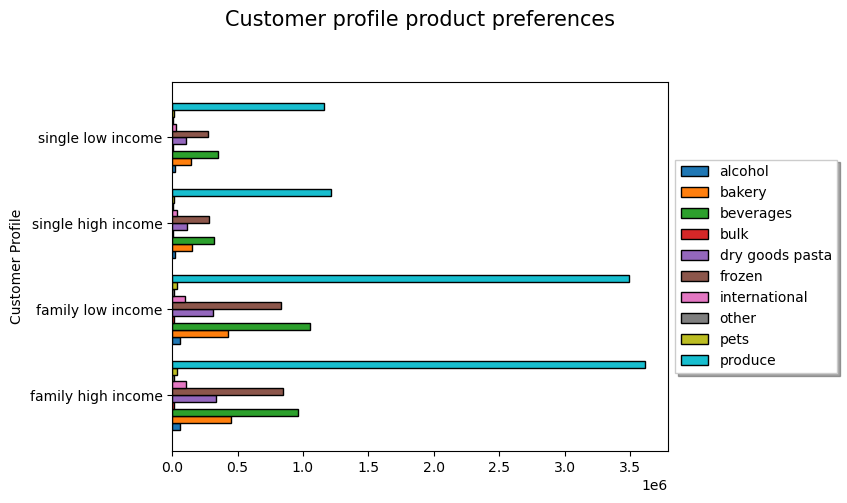

In [111]:
## Department category visual
df_depart_cust.plot.barh(stacked=False, edgecolor = 'black', width=0.8);
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1, fancybox=False, shadow=True)
plt.title('Customer profile product preferences', 
          pad = 40,
          fontsize=15,
         fontweight=2);
plt.ylabel('Customer Profile');

##### **Q8.2: Customer profiles with Regions - identify the link**

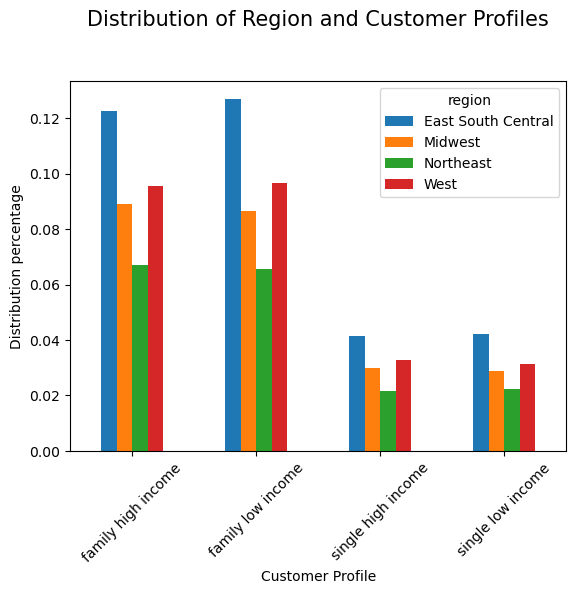

In [154]:
## Side by side bar chart to show the distribution of region and customer profiles

df_region = pd.crosstab(ords_prods_customer['customer_profile'], ords_prods_customer['region'], normalize = True)
df_region

df_region.plot.bar(stacked=False)
plt.title('Distribution of Region and Customer Profiles', 
          pad = 40,
          fontsize=15,
          fontweight=2);
plt.ylabel('Distribution percentage')
plt.xlabel('Customer Profile')
plt.xticks(rotation = 45);

### Answering the key questions

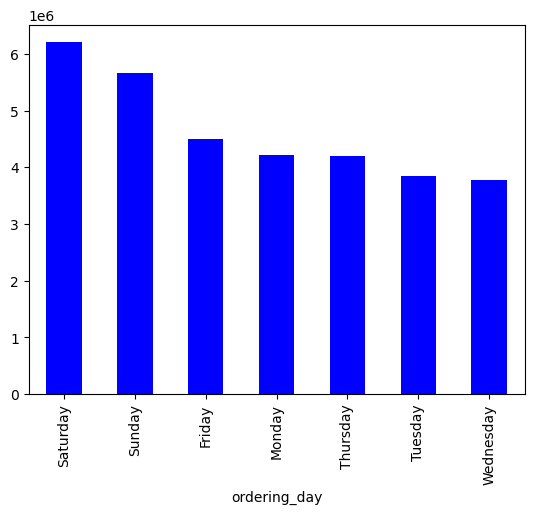

In [312]:
## Key question 1: Busiest days of the week

# The sales team needs to know what the busiest days of the week and hours of the
# day are (i.e., the days and times with the most orders) in order to schedule ads at
# times when there are fewer orders.

## Line chart

day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
ords_prods_customer.loc[:, 'ordering_day'] = pd.Categorical(ords_prods_customer['ordering_day'], categories=day_order, ordered=True)

ords_prods_customer['ordering_day'].value_counts().plot.bar(color = 'blue');


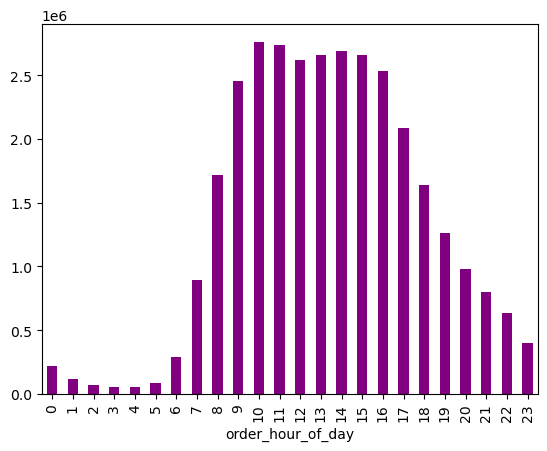

In [324]:
## Key question 1.2: Busiest hours of the day

# The sales team needs to know what the busiest hours of the
# day are (i.e., the days and times with the most orders) in order to schedule ads at
# times when there are fewer orders.

## Line chart

ords_prods_customer['order_hour_of_day'].value_counts().sort_index().plot.bar(color = 'purple');

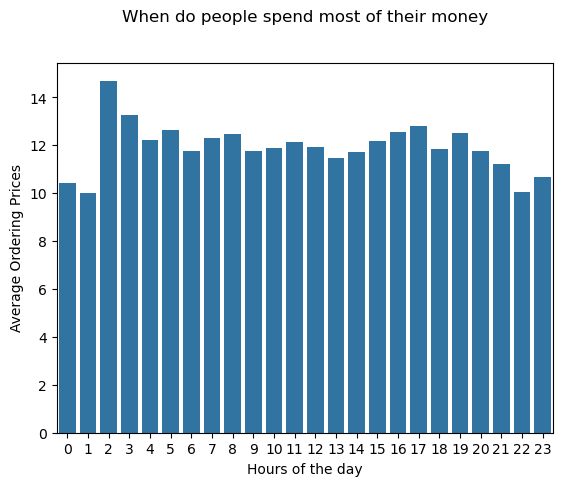

In [278]:
## Key Question 2:

## They also want to know whether there are particular times of the day when people
## spend the most money, as this might inform the type of products they advertise at
# these times.

df_price_hour = ords_prods_customer.groupby('order_hour_of_day')['prices'].mean().reset_index()

sns.barplot(data = df_price_hour, x = 'order_hour_of_day', y = 'prices')
plt.xlabel('Hours of the day')
plt.ylabel('Average Ordering Prices')
plt.title('When do people spend most of their money', pad = 30);

In [210]:
## Key Question 3

# Instacart has a lot of products with different price tags. Marketing and sales want to
# use simpler price range groupings to help direct their efforts.

# Creating groups based on the prices and creating pie chart
# 0.25     4.2
# 0.50     7.4
# 0.75    11.3
ords_prods_customer['prices'].quantile([0.25, 0.5, 0.75])

## Creating four price groups

ords_prods_customer.loc[(ords_prods_customer['prices'] < 4.2), 'price_category'] = 'low_price'
ords_prods_customer.loc[(ords_prods_customer['prices'] >= 4.2) & (ords_prods_customer['prices'] < 7.4), 'price_category'] = 'medium_price'
ords_prods_customer.loc[(ords_prods_customer['prices'] >=  7.4) & (ords_prods_customer['prices'] < 11.3), 'price_category'] = 'expensive_price'
ords_prods_customer.loc[(ords_prods_customer['prices'] >= 11.3), 'price_category'] = 'very_expensive_price'

## 

ords_prods_customer['price_category'].value_counts()

price_category
medium_price            8264810
expensive_price         8136955
very_expensive_price    8112236
low_price               7890855
Name: count, dtype: int64

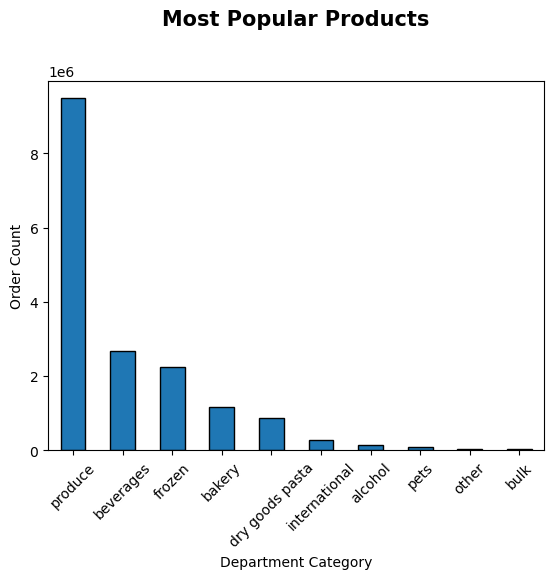

In [248]:
## Key Question 4

## Are there certain types of products that are more popular than others? The marketing
## and sales teams want to know which departments have the highest frequency of
## product orders.

department_order_counts = ords_prods_customer.groupby('department_category')['order_id'].count().reset_index()
department_order_counts.columns = ['department', 'order_count']
department_order_counts = department_order_counts.sort_values('order_count', ascending=False)

department_order_counts.plot(kind='bar', x='department', y='order_count', 
                             edgecolor='black', legend=False)

plt.xticks(rotation=45)
plt.title('Most Popular Products', pad=40, fontsize=15, fontweight='bold')
plt.xlabel('Department Category')
plt.ylabel('Order Count')

plt.show()

### Answering Marketing Department Questions

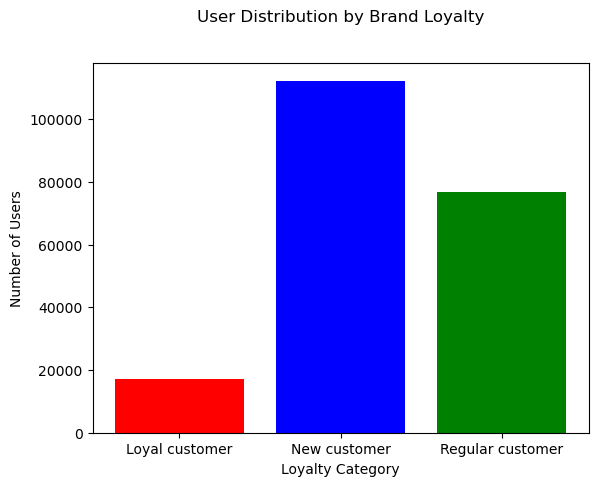

In [364]:
## What’s the distribution among users in regards to their brand loyalty (i.e., how
## often do they return to Instacart)?

# Creating the number of returned orders based on the loyalty flag and user

user_order_counts = ords_prods_customer.groupby(['user_id', 'loyalty_flag'])['order_id'].nunique().reset_index()
user_order_counts.columns = ['user_id', 'loyalty_flag', 'order_count']

# Aggregate order counts by loyalty_flag
loyalty_distribution = user_order_counts.groupby('loyalty_flag')['user_id'].count().reset_index()
loyalty_distribution.columns = ['loyalty_flag', 'user_count']
color = ['red', 'blue', 'green']
# Plot a bar chart
plt.bar(loyalty_distribution['loyalty_flag'], loyalty_distribution['user_count'], color = color)
plt.xlabel("Loyalty Category")
plt.ylabel("Number of Users")
plt.title("User Distribution by Brand Loyalty", pad = 30);

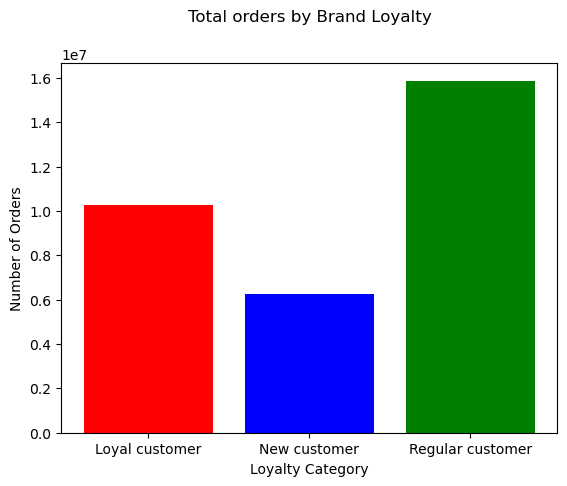

In [380]:
## Are there differences in ordering habits based on a customer’s loyalty status?

order_loyalty = ords_prods_customer.groupby('loyalty_flag')['order_id'].count().reset_index()

plt.bar(order_loyalty['loyalty_flag'], order_loyalty['order_id'], color = color)
plt.xlabel("Loyalty Category")
plt.ylabel("Number of Orders")
plt.title("Total orders by Brand Loyalty", pad = 30);

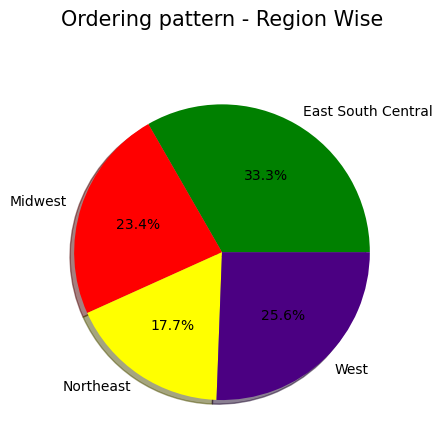

In [400]:
## Are there differences in ordering habits based on a customer’s region?

order_region = ords_prods_customer.groupby('region')['order_id'].count().reset_index()
order_region

plt.pie(order_region['order_id'], labels=order_region['region'], shadow = True, 
        autopct='%.1f%%',
        colors = colors,
        labeldistance=1.1)
plt.title('Ordering pattern - Region Wise', 
          pad = 30,
         fontsize=15,
         fontweight=2);

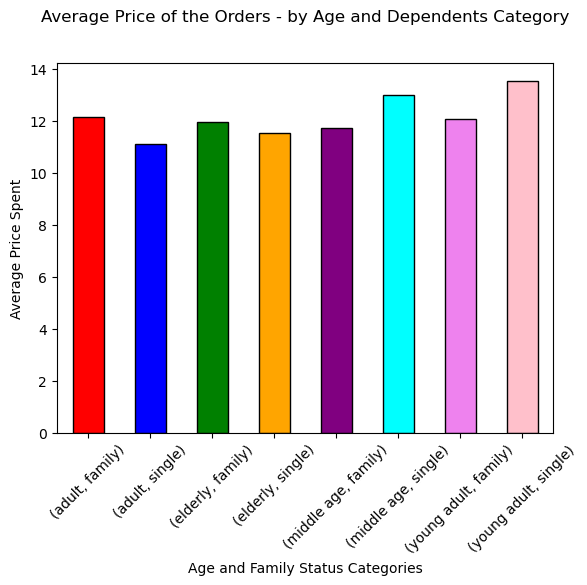

In [424]:
## Is there a connection between age and family status in terms of ordering habits?

df_age_family = ords_prods_customer.groupby(['age_category', 'dependant_category'])['prices'].mean()

colors = ['red', 'blue', 'green', 'orange', 'purple', 'cyan', 'violet', 'pink']

df_age_family.plot.bar(stacked = False, color = colors, edgecolor = 'black')
plt.xticks(rotation = 45)
plt.xlabel("Age and Family Status Categories")
plt.ylabel("Average Price Spent")
plt.title("Average Price of the Orders - by Age and Dependents Category", pad = 30);

In [438]:
## What different classifications does the demographic information suggest? Age? Income? Certain types of goods? Family status?
## What differences can you find in ordering habits of different customer
## profiles? Consider the price of orders, the frequency of orders, the products
## customers are ordering, and anything else you can think of.

demographic_pattern = ords_prods_customer.groupby(['age_category', 'income_category', 'dependant_category'])['order_id'].count().reset_index().sort_values(by='order_id', ascending= False)

demographic_pattern

,age_category,income_category,dependant_category,order_id
8,elderly,high income,family,3054244
16,middle age,high income,family,2915584
10,elderly,higher mid income,family,2777401
18,middle age,higher mid income,family,2727499
4,adult,low income,family,2624831
6,adult,lower mid income,family,2597087
30,young adult,lower mid income,family,1277945
28,young adult,low income,family,1223543
20,middle age,low income,family,1191018
22,middle age,lower mid income,family,1162645


In [452]:
demographic_pattern_2 = ords_prods_customer.groupby(['age_category', 'income_category', 'department_category'])['order_id'].count().reset_index().sort_values(by='order_id', ascending= False)

pd.set_option('display.max_rows', None)
demographic_pattern_2

,age_category,income_category,department_category,order_id
49,elderly,high income,produce,1208106
89,middle age,high income,produce,1159288
59,elderly,higher mid income,produce,1118363
99,middle age,higher mid income,produce,1091276
39,adult,lower mid income,produce,1043576
29,adult,low income,produce,1004789
159,young adult,lower mid income,produce,508328
149,young adult,low income,produce,459493
119,middle age,lower mid income,produce,458998
79,elderly,lower mid income,produce,426306
